# Machine Learning - Classification Assignment - Click Through Rate Prediction

Student - Jagadish Janakiraman

Assignment Date - 5/23/2022

## Objective
As part of this assignment, predict whether a user will click on an ad or not. A classification method usually designed to solve such problems is best suited here. As part of this assignment, applied 3 classification methods taught in Course 3 – The introduction to Machine Learning.

### 1. Preparing the problem

importing the required libraries

In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import os
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

In [2]:
# read the data into a data frame
data=pd.read_csv('data.csv')


### 2. Summarize Data

In [3]:
# to display all the columns
pd.set_option('display.max_columns', None)
#showing first 5 rows
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [4]:
# showing last 5 rows
data.tail()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
99994,False,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,783d53a5,04f5b394,1,0,17239,320,50,1973,3,39,100148,23,10,3,23,15,0
99995,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,79117e3c,711ee120,1,0,22261,320,50,2545,0,167,100084,221,10,2,29,0,0
99996,True,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,e774692b,1f0bc64f,1,0,21276,320,50,2443,2,39,-1,23,10,2,22,15,1
99997,True,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,4815ea13,d787e91b,1,0,20093,300,250,2295,2,35,100081,23,10,5,25,8,1
99998,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,594a6636,5096d134,1,0,22677,320,50,2617,0,35,-1,51,10,1,28,1,0


In [5]:
# check datatypes, shape,null values
print('*******Dataframe Information**************************************************')
print(data.info())
print('*******Check count of Null Values*********************************************')
print(data.isna().sum())
print('*******Check count of Unique Values*********************************************')
print(data.nunique())

*******Dataframe Information**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 n

### Question 1 : Perform missing value and outlier treatment, if needed, in the data set you received.

#### Answer 1 : Dataset has 99,999 rows and 26 columns. There is no missing values present in dataset.

### Question 2 : Perform categorical variable treatment:

2a) Identify the categorical columns 

2b) Use suitable techniques to treat these categorical columns. For instance, as explained earlier, the banner position is a categorical variable. 

#### Answer - 

#### 2a) Categorical columns are - C1, banner_pos, site_id, site_domain, site_category, app_id, app_domain, app_category, device_id, device_ip, device_model, device_type, device_conn_type and from C14 t0 C21

#### 2b) banner position is already label encoded, site category and app category can be label encoded.  Remaning category fields need not be encoded as the number of unique valuesin these columns are too high. Encoding them will create too many feature columns.
 


### Descriptive statistics

In [6]:
#Statistical Summary of Numeric Variables
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


### Data visualizations

#### Target Variable

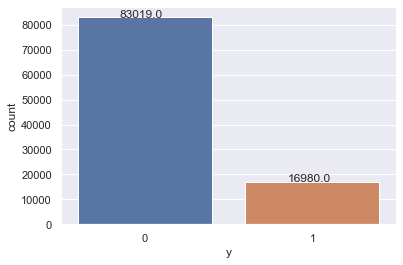

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data['y'],data=data)

#Iterate the returned axes of the countplot and show the count values at the top of the bars.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### Observation

#### ~16,980 people has clicked the advertisement and ~83,019 people have not clicked the advertisement. 

#### Advertisement Position

In [98]:
#labelEncoder = LabelEncoder()
#data['banner_pos_Encoded'] = labelEncoder.fit_transform( data['banner_pos'] )
# Banner position is already encoded; so a label encoder is not required

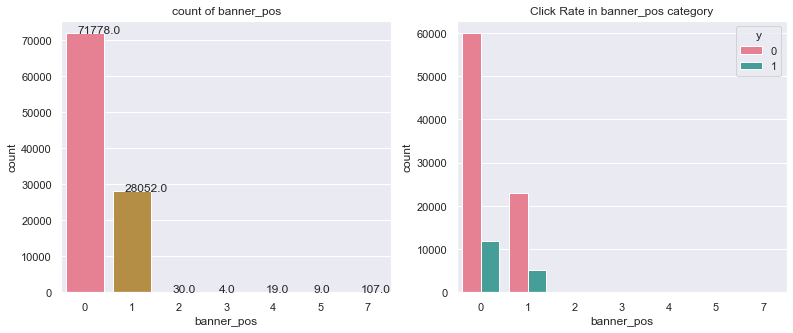

In [8]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
ax = sns.countplot(data['banner_pos'],palette='husl')
plt.title("count of banner_pos")
plt.subplot(1,2,2)
ax2 = sns.countplot(data['banner_pos'], hue = data['y'],palette="husl")
plt.title("Click Rate in banner_pos category")

#Iterate the returned axes of the countplot and show the count values at the top of the bars.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#for p in ax.patches:
#   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

#### Observation:
    
The banner position variable in the dataset is highly imbalanced. 71778 addvertisement in position zero. ~28,000 advertisement is in position 1. 

Banner Position 0 has ~10K+ clicks whereas Banner Position 1 has ~5K clicks. 

#### Device Type

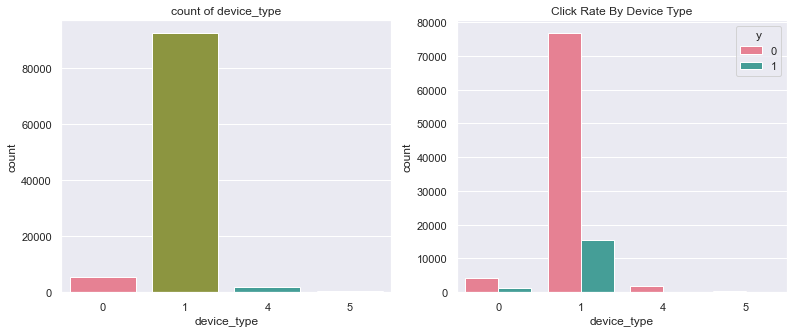

In [9]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['device_type'],palette='husl')
plt.title("count of device_type")
plt.subplot(1,2,2)
sns.countplot(data['device_type'], hue = data['y'],palette="husl")
plt.title("Click Rate By Device Type")
plt.show()

#### Observation:
    
Device Type 1 is majorly used. 

~16K clicks came from device type 1 

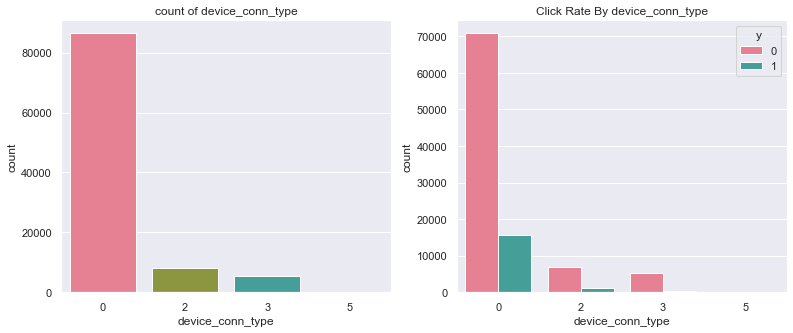

In [10]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['device_conn_type'],palette='husl')
plt.title("count of device_conn_type")
plt.subplot(1,2,2)
sns.countplot(data['device_conn_type'], hue = data['y'],palette="husl")
plt.title("Click Rate By device_conn_type")
plt.show()

Observation:
Connection Type 0 is majorly used and most of the clicks came from connecction type 0

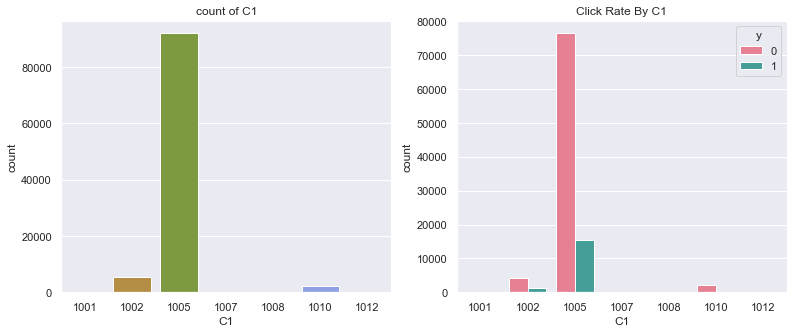

In [11]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['C1'],palette='husl')
plt.title("count of C1")
plt.subplot(1,2,2)
sns.countplot(data['C1'], hue = data['y'],palette="husl")
plt.title("Click Rate By C1")
plt.show()

#### Observation: 
C1 category 1005 is the major contributor of clicks

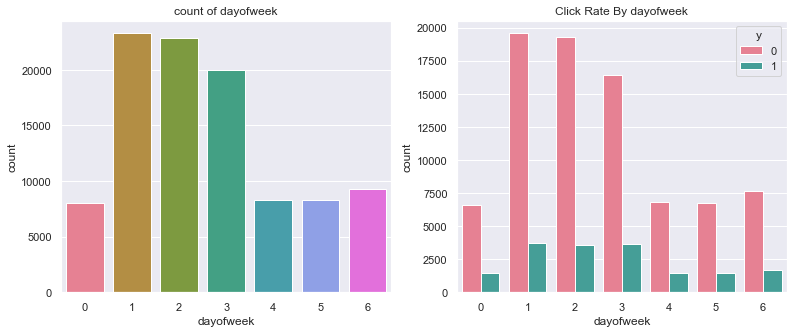

In [12]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['dayofweek'],palette='husl')
plt.title("count of dayofweek")
plt.subplot(1,2,2)
sns.countplot(data['dayofweek'], hue = data['y'],palette="husl")
plt.title("Click Rate By dayofweek")
plt.show()

Observation:
Monday, Tuesday and Wednesday are the peak days where more clicks are made 

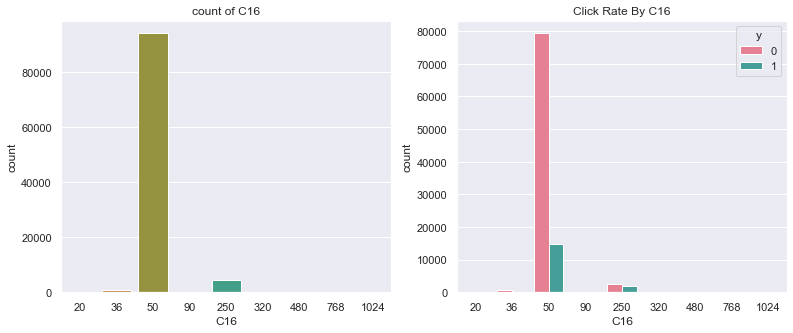

In [13]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['C16'],palette='husl')
plt.title("count of C16")
plt.subplot(1,2,2)
sns.countplot(data['C16'], hue = data['y'],palette="husl")
plt.title("Click Rate By C16")
plt.show()

#### Observation
For Category C16, Most of the clicks are from type 50

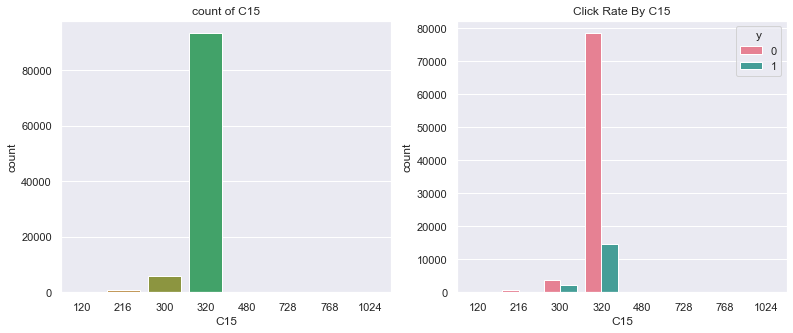

In [14]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['C15'],palette='husl')
plt.title("count of C15")
plt.subplot(1,2,2)
sns.countplot(data['C15'], hue = data['y'],palette="husl")
plt.title("Click Rate By C15")
plt.show()

### Observation 
For Category C15, Most of the clicks are from type 320

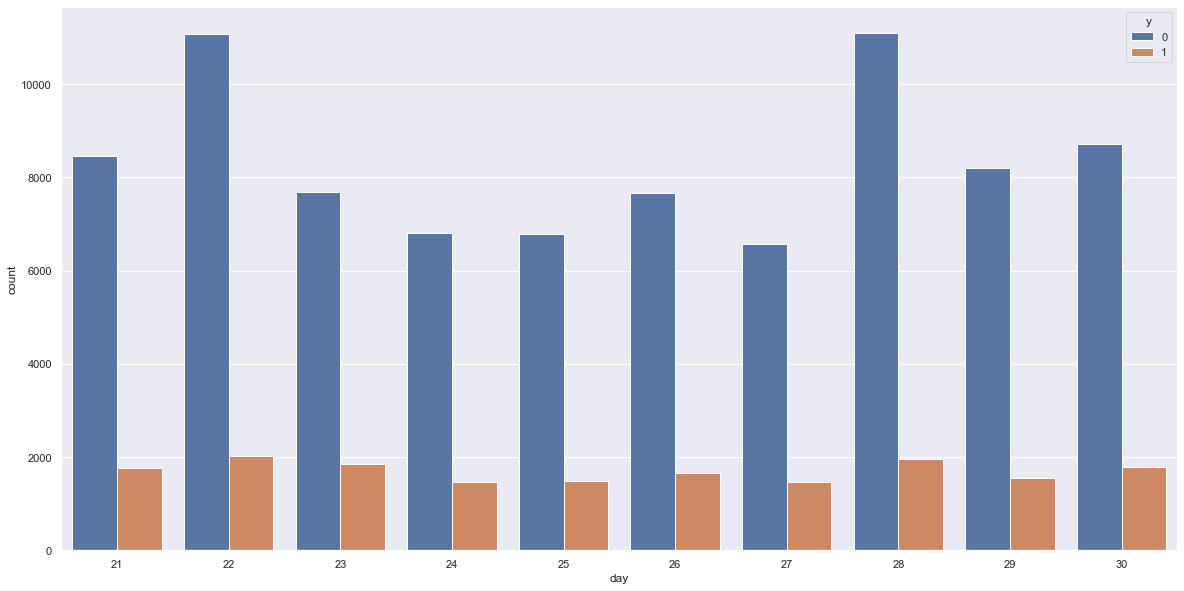

In [15]:
#Day VS Click
plt.figure(figsize=(20,10))
sns.countplot(x='day',hue='y',data=data)
plt.show()

#### Observation:
Successful click count is consistent throughput the day

<AxesSubplot:xlabel='hour', ylabel='count'>

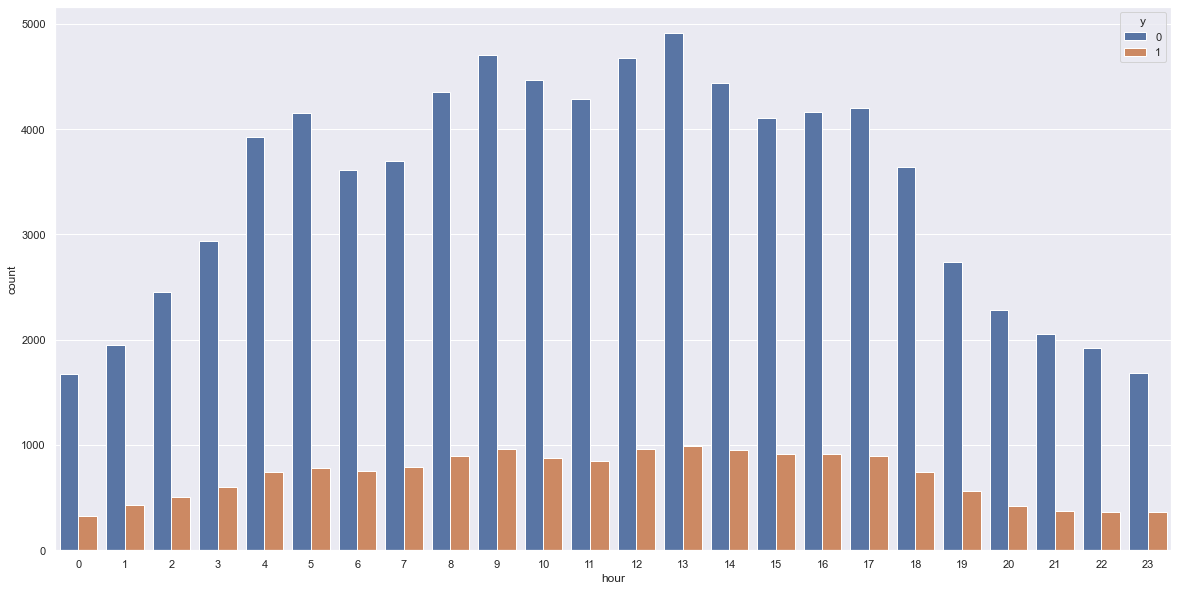

In [16]:
#Hour VS Click
plt.figure(figsize=(20,10))
sns.countplot(x='hour',hue='y',data=data)

Observation: 8 AM to 5 PM is when most of the add is clicked. 

### Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

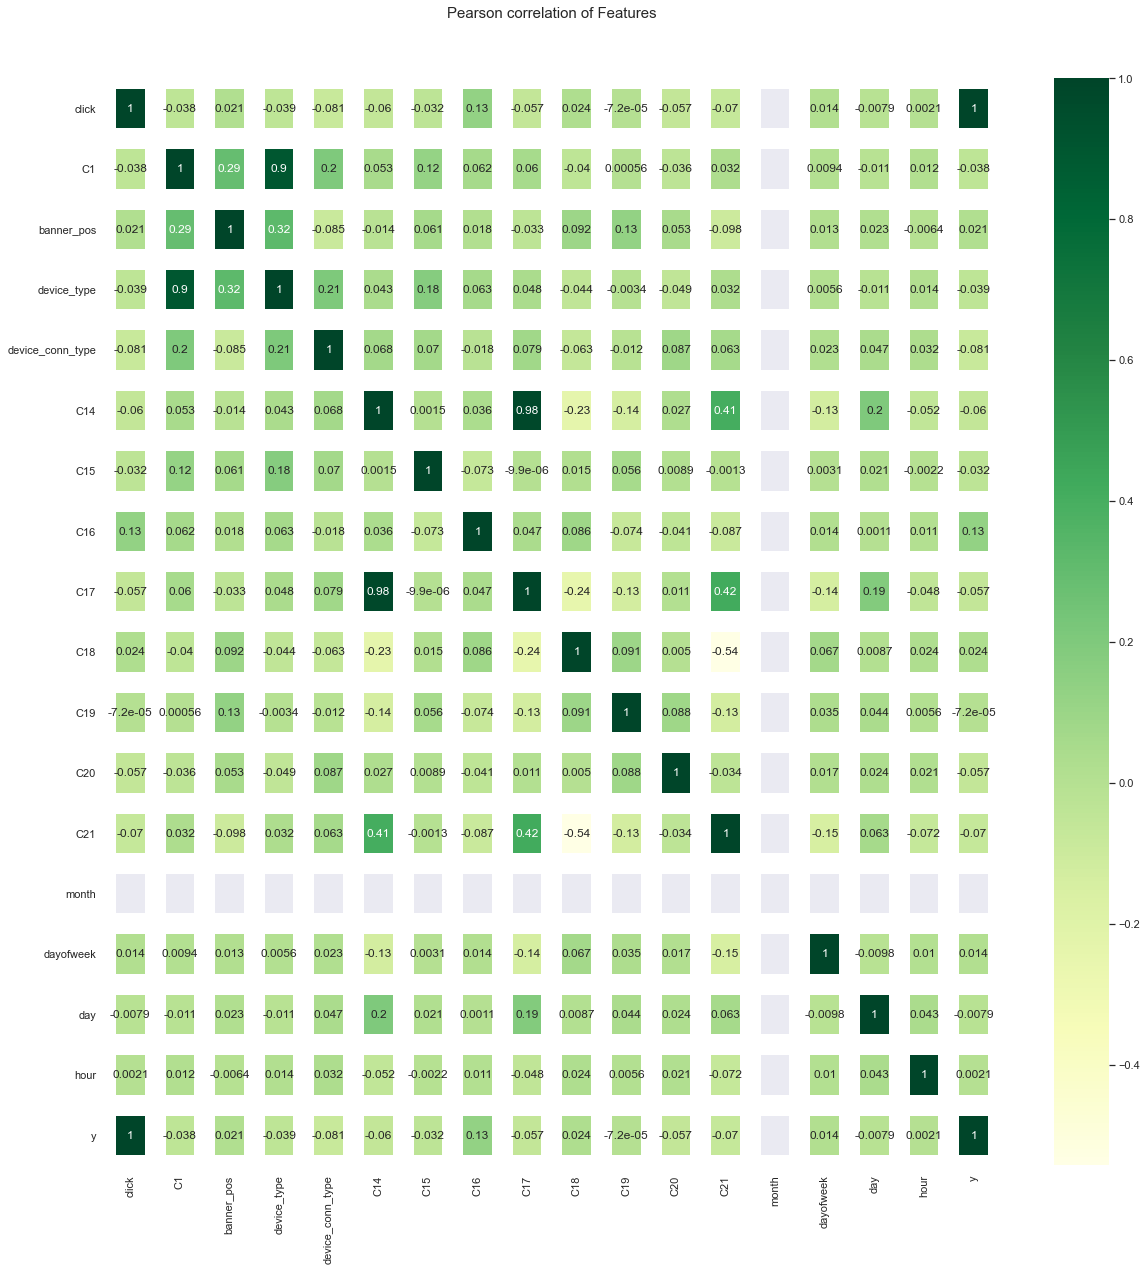

In [17]:
corr = data.corr()

f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(corr, ax=ax, annot=True,linewidths=20,cmap='YlGn')
#sns.heatmap(corr, cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### Observation : 
    Target variable is not affected by columns - Month, Day, C19, C1, Device Type, Conn Type, C15, C17, C21

## 3. Prepare Data

In [18]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['site_category'] = labelEncoder.fit_transform(data['site_category'])
data['app_category'] = labelEncoder.fit_transform(data['app_category'])

In [19]:
data.dtypes


click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category        int32
app_id              object
app_domain          object
app_category         int32
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

In [ ]:
# The objects dtype can be dropped
#data.drop(['site_id', 'site_domain','app_id','app_domain','device_id','device_ip','device_model'], axis=1, inplace=True)

#### Checking duplicate rows

In [20]:
duplicate=data[data.duplicated(subset=['banner_pos', 'site_id', 'site_domain',
                                       'site_category','app_id','app_domain','app_category','device_id',
                                       'device_ip','device_model','C14','C15','C16','C17','C18','C19','C20','C21',
                                      'month','dayofweek','day','hour','y'])]
print(duplicate)

       click    C1  banner_pos   site_id site_domain  site_category    app_id  \
396    False  1005           0  85f751fd    c4e18dd6              5  d36838b1   
5750   False  1005           1  a7853007    7e091613             17  ecad2386   
7491   False  1005           0  5bcf81a2    9d54950b             17  ecad2386   
7888   False  1005           0  85f751fd    c4e18dd6              5  d36838b1   
8691   False  1005           1  a7853007    7e091613             17  ecad2386   
...      ...   ...         ...       ...         ...            ...       ...   
99823  False  1005           0  c5944aac    2d235ae0              1  ecad2386   
99836  False  1005           0  5bcf81a2    9d54950b             17  ecad2386   
99892   True  1005           0  85f751fd    c4e18dd6              5  316440d7   
99905  False  1005           1  e8f79e60    c4342784             17  ecad2386   
99914  False  1005           1  17caea14    0dde25ec             17  ecad2386   

      app_domain  app_categ

#### Observation
658 Duplicate records in the dataset. This data can be dropped from the dataframe.

In [21]:
# Drop the 658 duplicate records
data = data.drop_duplicates(subset=['banner_pos', 'site_id', 'site_domain',
                                       'site_category','app_id','app_domain','app_category','device_id',
                                       'device_ip','device_model','C14','C15','C16','C17','C18','C19','C20','C21',
                                      'month','dayofweek','day','hour','y'])
data



,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,17,ecad2386,7801e8d9,0,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,17,ecad2386,7801e8d9,0,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,1,ecad2386,7801e8d9,0,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,5,ecad2386,7801e8d9,0,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,0,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,1005,0,7294ea0f,863fa89d,3,ecad2386,7801e8d9,0,a99f214a,783d53a5,04f5b394,1,0,17239,320,50,1973,3,39,100148,23,10,3,23,15,0
99995,False,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,0,a99f214a,79117e3c,711ee120,1,0,22261,320,50,2545,0,167,100084,221,10,2,29,0,0
99996,True,1005,0,85f751fd,c4e18dd6,5,7358e05e,b9528b13,16,927c68c6,e774692b,1f0bc64f,1,0,21276,320,50,2443,2,39,-1,23,10,2,22,15,1
99997,True,1005,0,5b08c53b,7687a86e,3,ecad2386,7801e8d9,0,a99f214a,4815ea13,d787e91b,1,0,20093,300,250,2295,2,35,100081,23,10,5,25,8,1


#### Seprating dependent and independent variables

In [22]:
x=data.drop(['y','click'],axis=1) #contain all  independent variable
y=data['y']           #dependent variable

In [23]:
x = x.drop(['site_id', 'site_domain', 'app_id','app_domain','device_id','device_ip','device_model' ], axis=1)
print(x)

         C1  banner_pos  site_category  app_category  device_type  \
0      1005           1             17             0            1   
1      1005           1             17             0            1   
2      1005           0              1             0            1   
3      1002           0              5             0            0   
4      1005           0              1             0            1   
...     ...         ...            ...           ...          ...   
99994  1005           0              3             0            1   
99995  1005           0              1             0            1   
99996  1005           0              5            16            1   
99997  1005           0              3             0            1   
99998  1005           0              1             0            1   

       device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  month  \
0                     0  22683  320   50  2528    0   39  100075  221     10   
1          

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   C1                99341 non-null  int64
 1   banner_pos        99341 non-null  int64
 2   site_category     99341 non-null  int32
 3   app_category      99341 non-null  int32
 4   device_type       99341 non-null  int64
 5   device_conn_type  99341 non-null  int64
 6   C14               99341 non-null  int64
 7   C15               99341 non-null  int64
 8   C16               99341 non-null  int64
 9   C17               99341 non-null  int64
 10  C18               99341 non-null  int64
 11  C19               99341 non-null  int64
 12  C20               99341 non-null  int64
 13  C21               99341 non-null  int64
 14  month             99341 non-null  int64
 15  dayofweek         99341 non-null  int64
 16  day               99341 non-null  int64
 17  hour              99341 non-nul

#### Question 7 - Use model simplification techniques like feature creation and selection, to improve model predictability. 

#### Answer 7 -  Feature Selection

[0.00443522 0.01477922 0.02808589 0.02324775 0.00466476 0.01814181
 0.17981262 0.00765553 0.02038725 0.0326747  0.02219887 0.02278096
 0.09442255 0.02123061 0.         0.04631765 0.05049832 0.40866629]


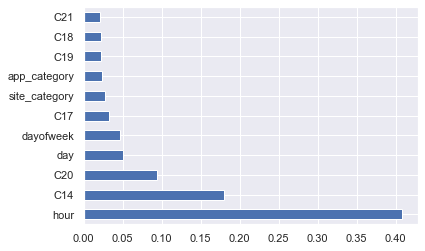

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

### Observation:
We can remove less important features from the data set

In [26]:
x=x.drop(['C17','C18','C19', 'C21','app_category','site_category'],axis=1)

#### Handling Imbalanced data

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

spliting of data into train and test data

Original dataset shape Counter({0: 82370, 1: 16971})
Resampled dataset shape Counter({0: 82370, 1: 82370})


<AxesSubplot:xlabel='y', ylabel='count'>

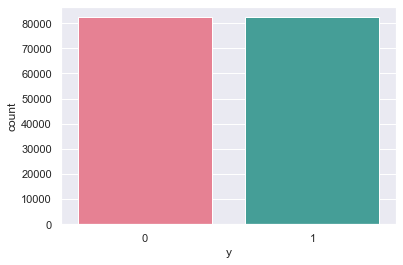

In [27]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

#### Question 3 - Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20).

#### Answer 3 - 

In [28]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(115318, 12) (49422, 12) (115318,) (49422,)


#### Question 4 - Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.

#### Answer 4. Model Selection

Problem can be identified as Binary Classification (wheather user will click on a add or not)

Dataset has more than 99K records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:

1.Logistic Regression

2.Random Forest

3.XGBClassifier

#### 1.Logistic Regression

In [29]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.5709805349844199
ROC_AUC Score: 0.5726441255917547


#### Question 5 - For all 3 methods, use appropriate evaluation metrics to assess model performance. Also, evaluate the models' basis the cross-validation.

In [30]:
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

           0       0.64      0.56      0.60     27882
           1       0.51      0.59      0.54     21540

    accuracy                           0.57     49422
   macro avg       0.57      0.57      0.57     49422
weighted avg       0.58      0.57      0.57     49422



### ROC Curve

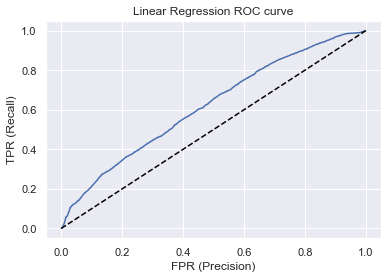

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[15605  8926]
 [12277 12614]]


<AxesSubplot:>

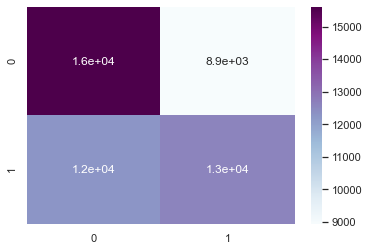

In [32]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

#### 2.RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.8163975557444053
ROC_AUC Score: 0.8225014577584808


In [34]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80     21169
           1       0.89      0.78      0.83     28253

    accuracy                           0.82     49422
   macro avg       0.82      0.82      0.82     49422
weighted avg       0.83      0.82      0.82     49422



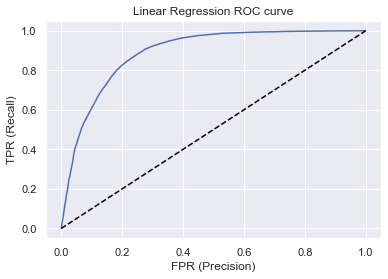

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[18313  2856]
 [ 6218 22035]]


<AxesSubplot:>

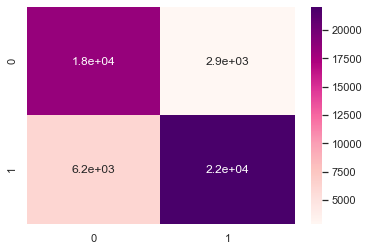

In [36]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

#### 3. XGBClassifier

In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.671502569705799
ROC_AUC Score: 0.6719455627808569


In [38]:
print(classification_report(y_predict,ytest))


              precision    recall  f1-score   support

           0       0.64      0.68      0.66     23168
           1       0.70      0.66      0.68     26254

    accuracy                           0.67     49422
   macro avg       0.67      0.67      0.67     49422
weighted avg       0.67      0.67      0.67     49422



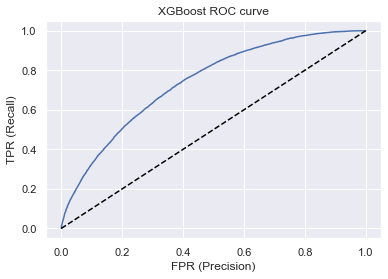

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[15732  8799]
 [ 7436 17455]]


<AxesSubplot:>

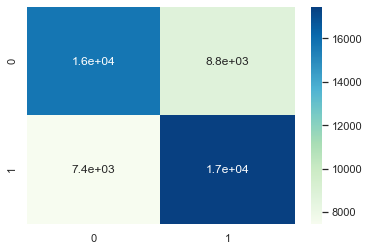

In [40]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

#### Question 6 - Compare which methods work best based on the evaluation metrics mentioned in the previous point.

#### Answer 6 -  Comparing the model

In [41]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.570981,0.506770,0.585608,0.543344,0.572644
Randomforest,0.816398,0.885260,0.779917,0.829256,0.822501
XGBClassifier,0.671503,0.701257,0.664851,0.682569,0.671946


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

from sklearn.svm import SVC
classifiersvc = SVC()
classifiersvc.fit(xtrain, ytrain)

from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_test,y_pred_svc)